In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from yellowbrick.model_selection.importances import FeatureImportances
import scikitplot as skplt
import lightgbm as lgbm
import set_dataset as k
%matplotlib inline
import importlib
importlib.reload(k)

<module 'set_dataset' from '/Users/kelvin/GAMES/src/set_dataset.py'>

In [22]:
x,y = k.x_and_y(0.70)
print(x.shape)
print(y.shape)
print(f'Percentage of Majority Class: {round(y[y==0].count() / y.shape[0]*100, 2)}%')
print(f'Percentage of Minority Class: {round(y[y==1].count() / y.shape[0]*100, 2)}%')
y.value_counts()

(27075, 413)
(27075,)
Percentage of Majority Class: 86.43%
Percentage of Minority Class: 13.57%


0    23401
1     3674
dtype: int64

## LOG REG COEF

Displaying top 245 variables                   feature      coef
156                   fps  5.146940
361            team_based  5.051137
182      great_soundtrack  3.945407
319               shooter  3.596449
106               classic  2.780685
..                    ...       ...
297             realistic  0.000000
311               sandbox  0.000000
101        choices_matter  0.000000
65   animation_&_modeling  0.000000
412              e_sports  0.000000

[413 rows x 2 columns]


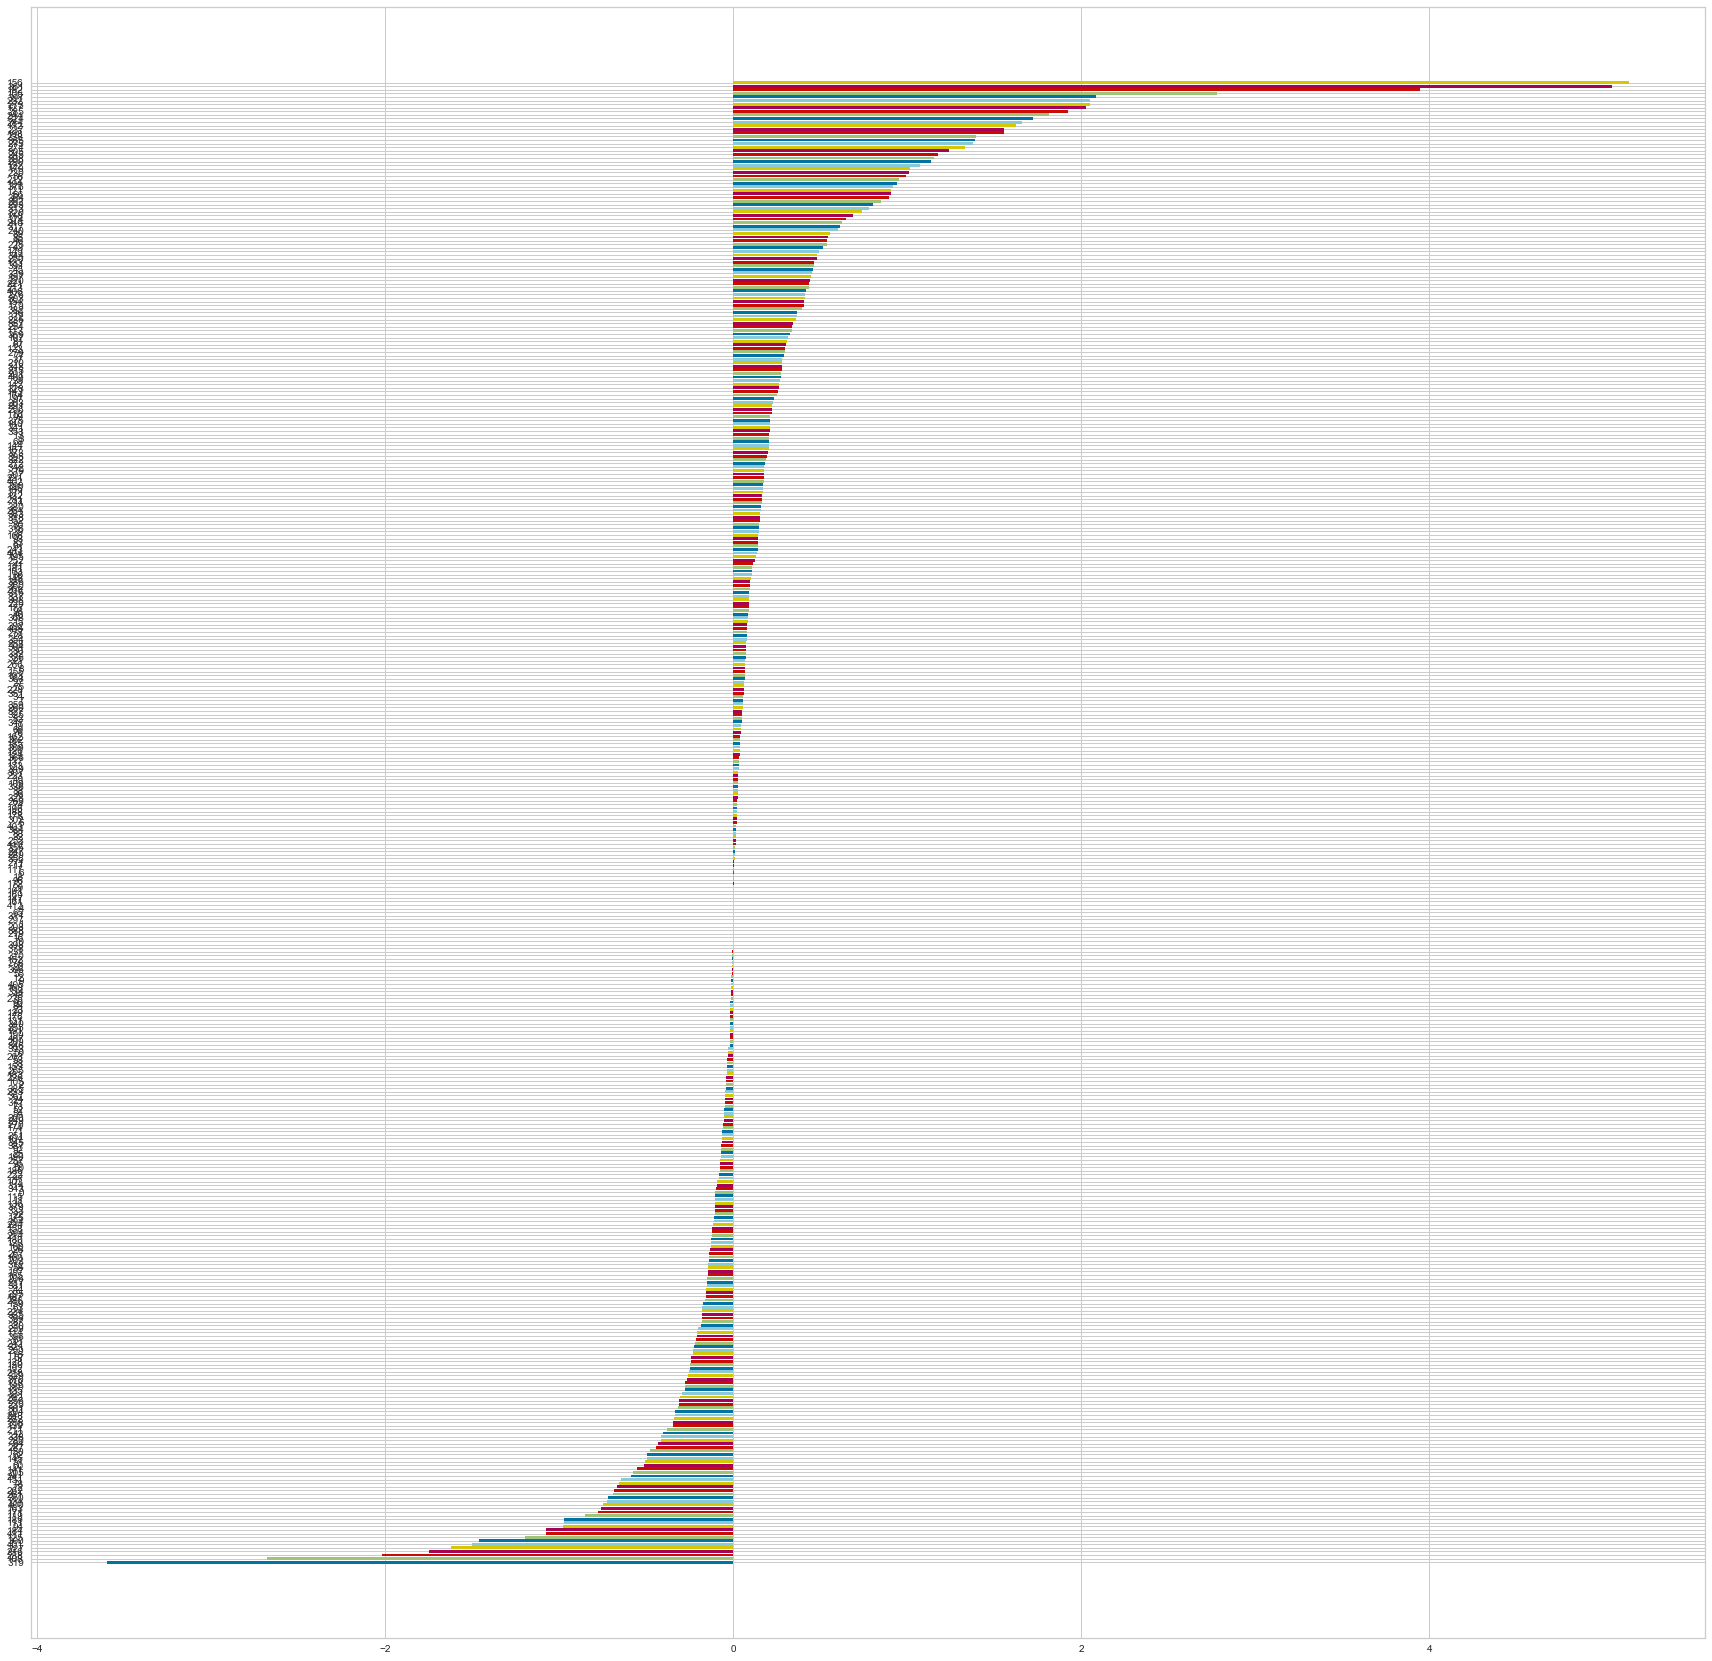

In [23]:
importlib.reload(k)
x_coef, y, coef = k.top_logreg_coef_l1(x,y, RandomOverSampler(), 350)

In [24]:
coefs = coef.copy()
pd.set_option('display.max_rows', 450)
coef.coef = abs(coef.coef)
coef = coef.sort_values(by='coef', ascending=False).head(350)

In [25]:
new_db = pd.concat([x_coef, y], axis=1).rename(columns={0: "y"})
new_db.to_csv("db_coef350.csv", index=False)

## XGB Feature Importance

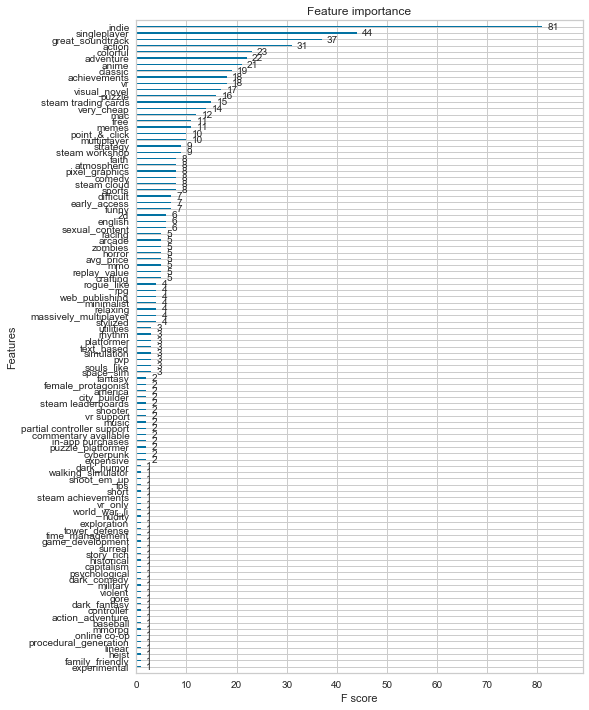

                            Gini-importance
singleplayer                       0.192704
steam cloud                        0.053635
indie                              0.049410
multiplayer                        0.046674
anime                              0.042817
very_cheap                         0.032689
action                             0.027453
steam trading cards                0.025867
great_soundtrack                   0.024713
strategy                           0.018296
vr                                 0.018217
classic                            0.018206
adventure                          0.017587
funny                              0.015775
mac                                0.014120
family_friendly                    0.013192
memes                              0.012731
visual_novel                       0.012597
puzzle                             0.011384
free                               0.010869
online co-op                       0.010861
dark_comedy                     

In [26]:
importlib.reload(k)
x_top, y, top = k.top_xgb_importance(x_coef, y, RandomOverSampler(), 100)

In [27]:
top = top.reset_index().rename(columns={'index':'variables'})

In [28]:
top = top.reset_index().rename(columns={'index':'variables'})
top.to_csv('features_xgb.csv', index=False)

In [29]:
new_db = pd.concat([x_top, y], axis=1).rename(columns={0: "y"})
new_db.to_csv("db_coef350_xgb100.csv", index=False)

Displaying top 245 variables                        feature      coef
36                     english  0.082784
5                   very_cheap  0.069369
39                  rogue_like  0.037483
22               point_&_click  0.029617
17                visual_novel  0.029197
34                    colorful  0.027519
8             great_soundtrack  0.026274
91                      linear  0.025707
18                      puzzle  0.024248
32                  platformer  0.023480
0                 singleplayer  0.022242
49               tower_defense  0.022069
11                     classic  0.021434
45                    stylized  0.021194
98                     america  0.018665
99          steam achievements  0.018148
13                       funny  0.017948
27                       music  0.017830
25              pixel_graphics  0.017762
86                 shoot_em_up  0.017122
42                      rhythm  0.016471
10                          vr  0.015933
24                      come

,feature,coef
39,rogue_like,0.037483
22,point_&_click,0.029617
17,visual_novel,0.029197
8,great_soundtrack,0.026274
18,puzzle,0.024248
32,platformer,0.023480
0,singleplayer,0.022242
49,tower_defense,0.022069
11,classic,0.021434
13,funny,0.017948


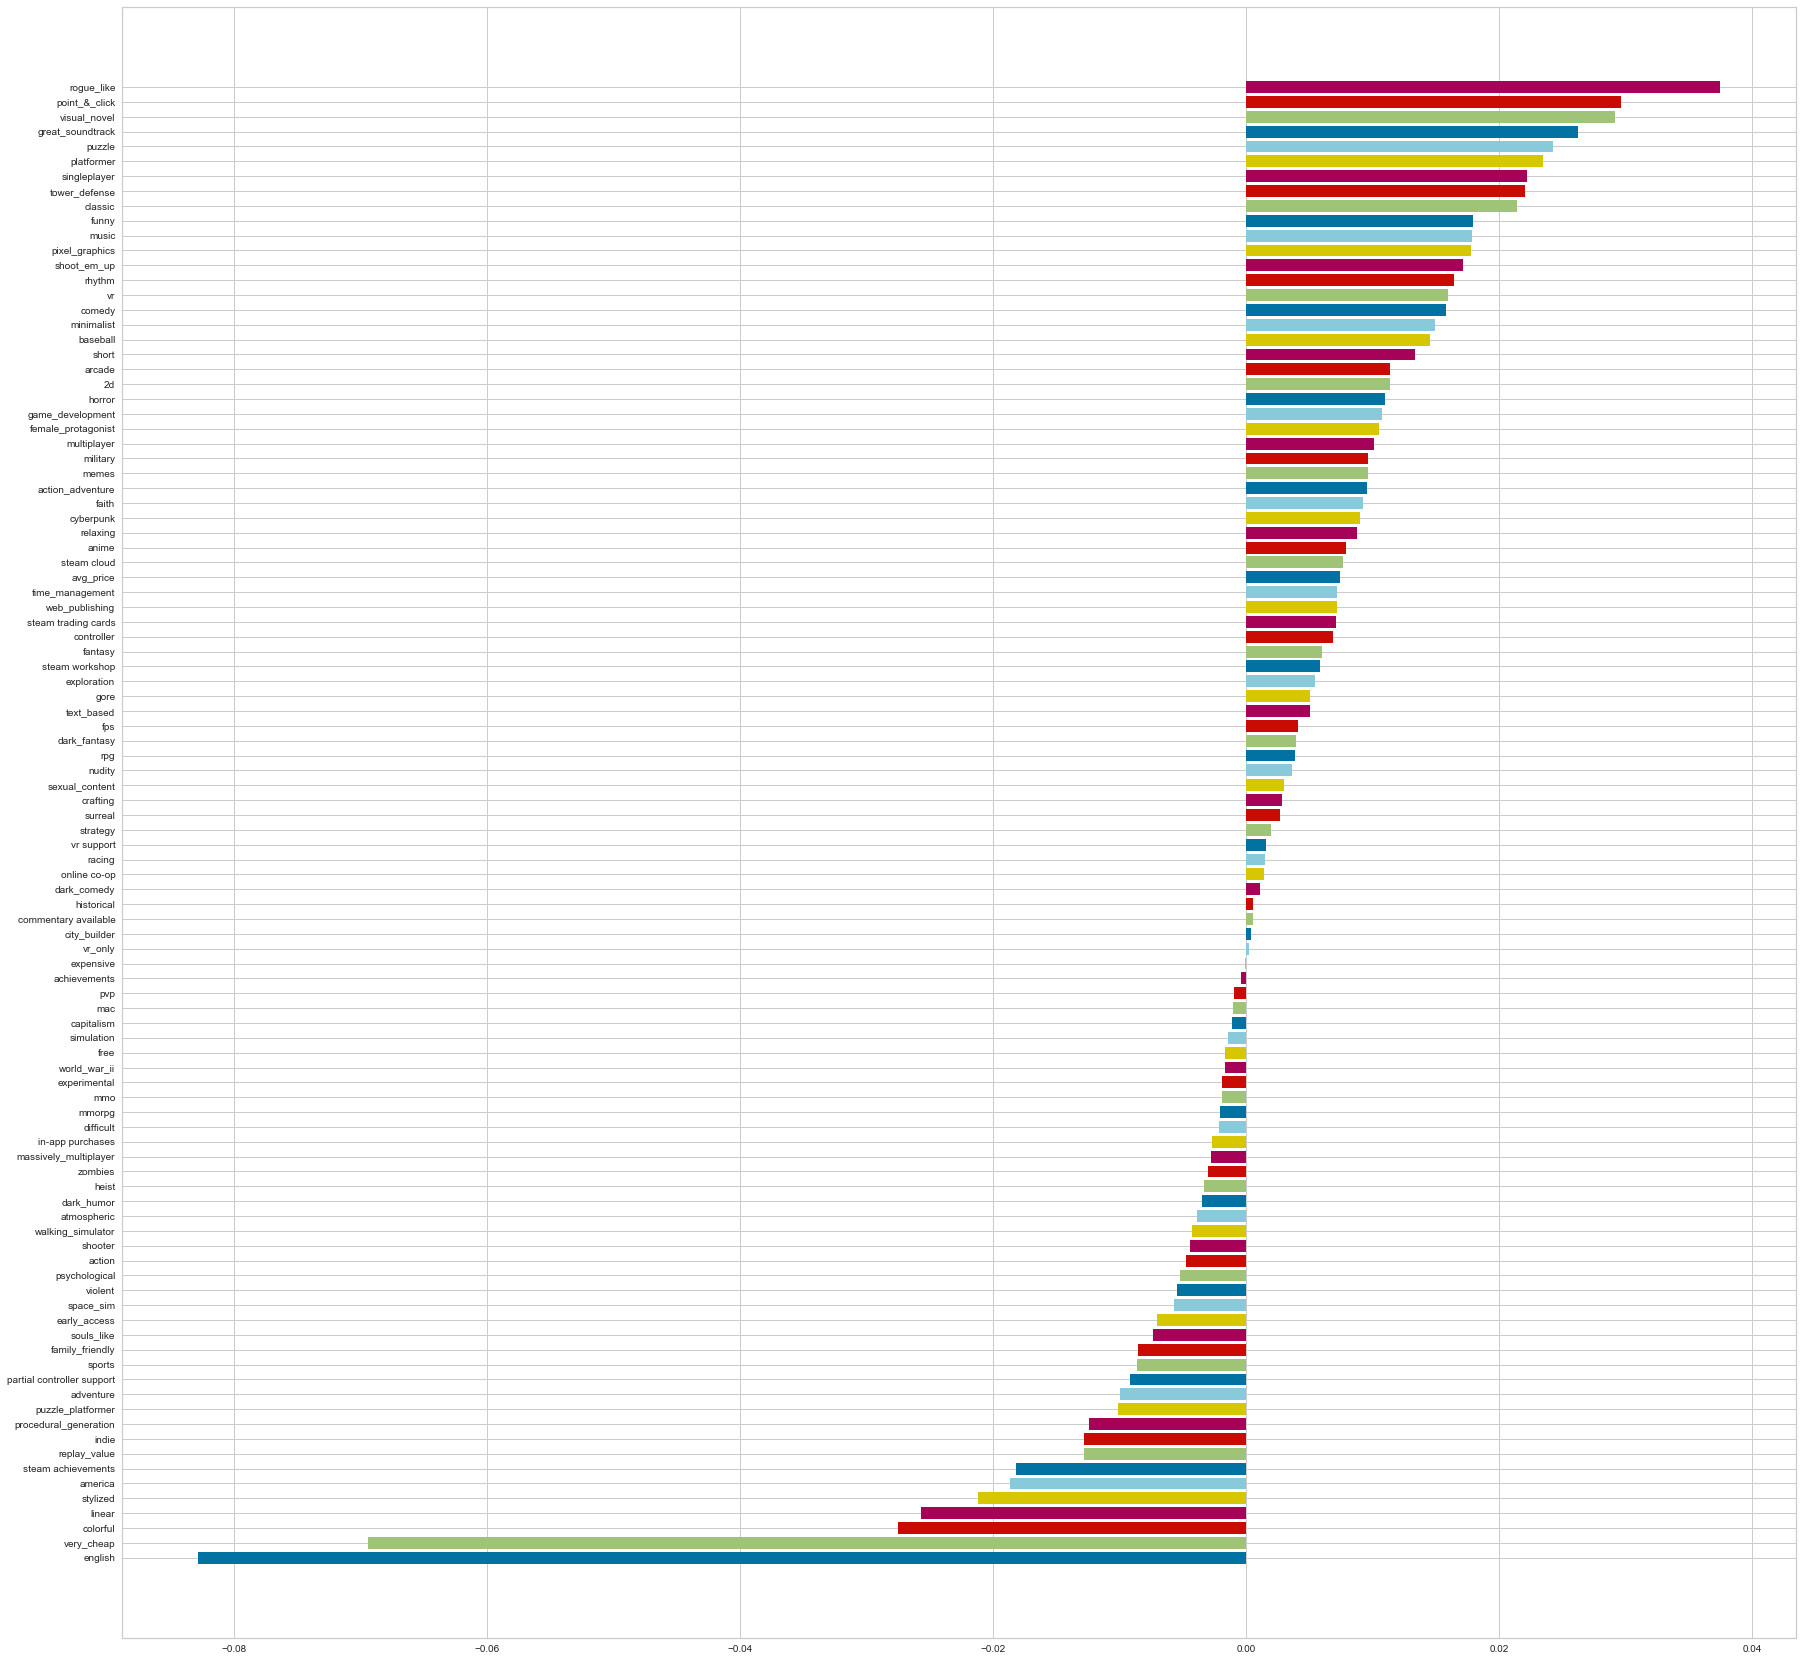

In [30]:
importlib.reload(k)
x_coef, y, coef = k.top_logreg_coef(x_top,y, RandomOverSampler(), 100)
coef = coef.sort_values(by='coef', ascending=False)
coef

In [32]:
coef = coef.sort_values(by='coef', ascending=False)
coef.to_csv("log_reg_coef1.csv", index=False)

In [551]:
models = {'Light GBM': lgbm.LGBMClassifier(),
          'XGBoost': XGBClassifier(),
          'Logistic Regression': LogisticRegression(solver='lbfgs'),
          'Random Forest': RandomForestClassifier(), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}

In [552]:
importlib.reload(k)
model_scores, models_fitted, scaled_instance = k.fit_predict_KFold(x_top, y, models, RandomOverSampler())

                      Precision  Recall  F-Score  ROC-AUC
Light GBM                  0.51    0.81     0.62     0.84
XGBoost                    0.47    0.81     0.60     0.83
Logistic Regression        0.49    0.71     0.58     0.80
Random Forest              0.66    0.53     0.59     0.74
Gaussian Naive Bayes       0.68    0.37     0.48     0.67
Decision Tree              0.50    0.50     0.50     0.71


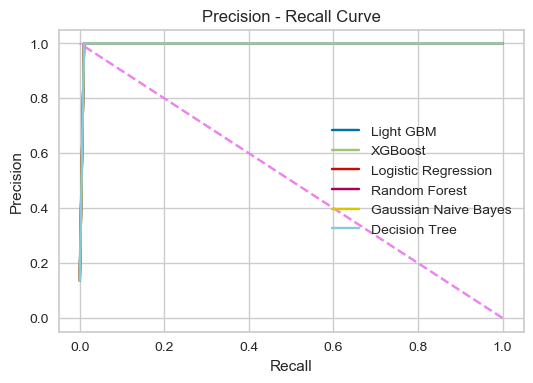

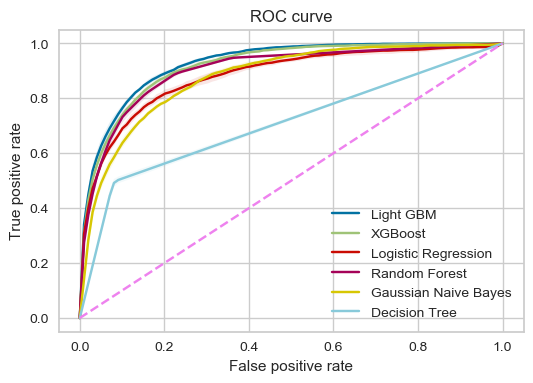

In [553]:
importlib.reload(k)
k.metrics_KF(model_scores)
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

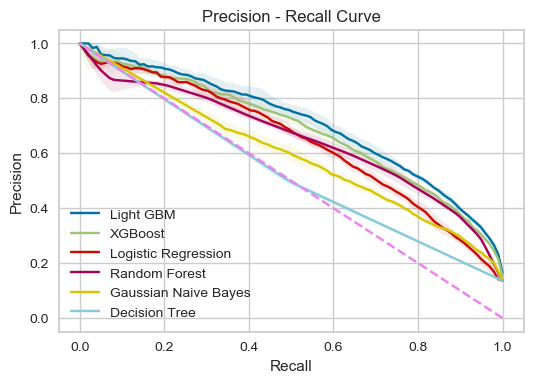

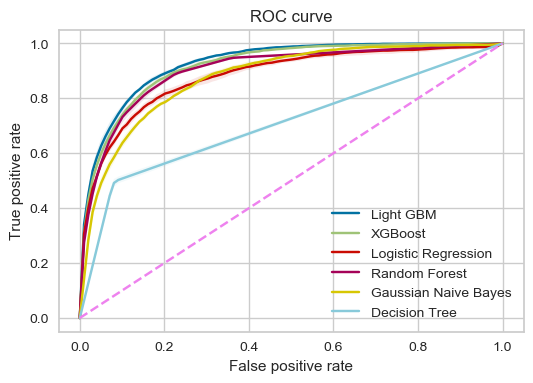

In [563]:
importlib.reload(k)
k.curves_KF(model_scores, models_fitted)

Displaying top 245 variables                   feature      coef
43                english  0.047309
4              very_cheap  0.038633
33          point_&_click  0.035064
46               colorful  0.031637
21           visual_novel  0.031624
54            local_co_op  0.030260
38             rogue_like  0.029311
17                 puzzle  0.028708
8        great_soundtrack  0.026011
0            singleplayer  0.024303
57          tower_defense  0.020978
36                  music  0.020926
12                 casual  0.019337
13                classic  0.019106
76                   cute  0.018871
30             platformer  0.017473
15                  memes  0.017083
35               stylized  0.016795
40  procedural_generation  0.016649
11                     vr  0.016576
63                 arcade  0.016127
16                 comedy  0.015905
93             futuristic  0.014941
29         pixel_graphics  0.014750
71               relaxing  0.014696
37             minimalist  0.014597

,feature,coef
33,point_&_click,0.035064
21,visual_novel,0.031624
54,local_co_op,0.030260
38,rogue_like,0.029311
17,puzzle,0.028708
8,great_soundtrack,0.026011
0,singleplayer,0.024303
57,tower_defense,0.020978
36,music,0.020926
13,classic,0.019106


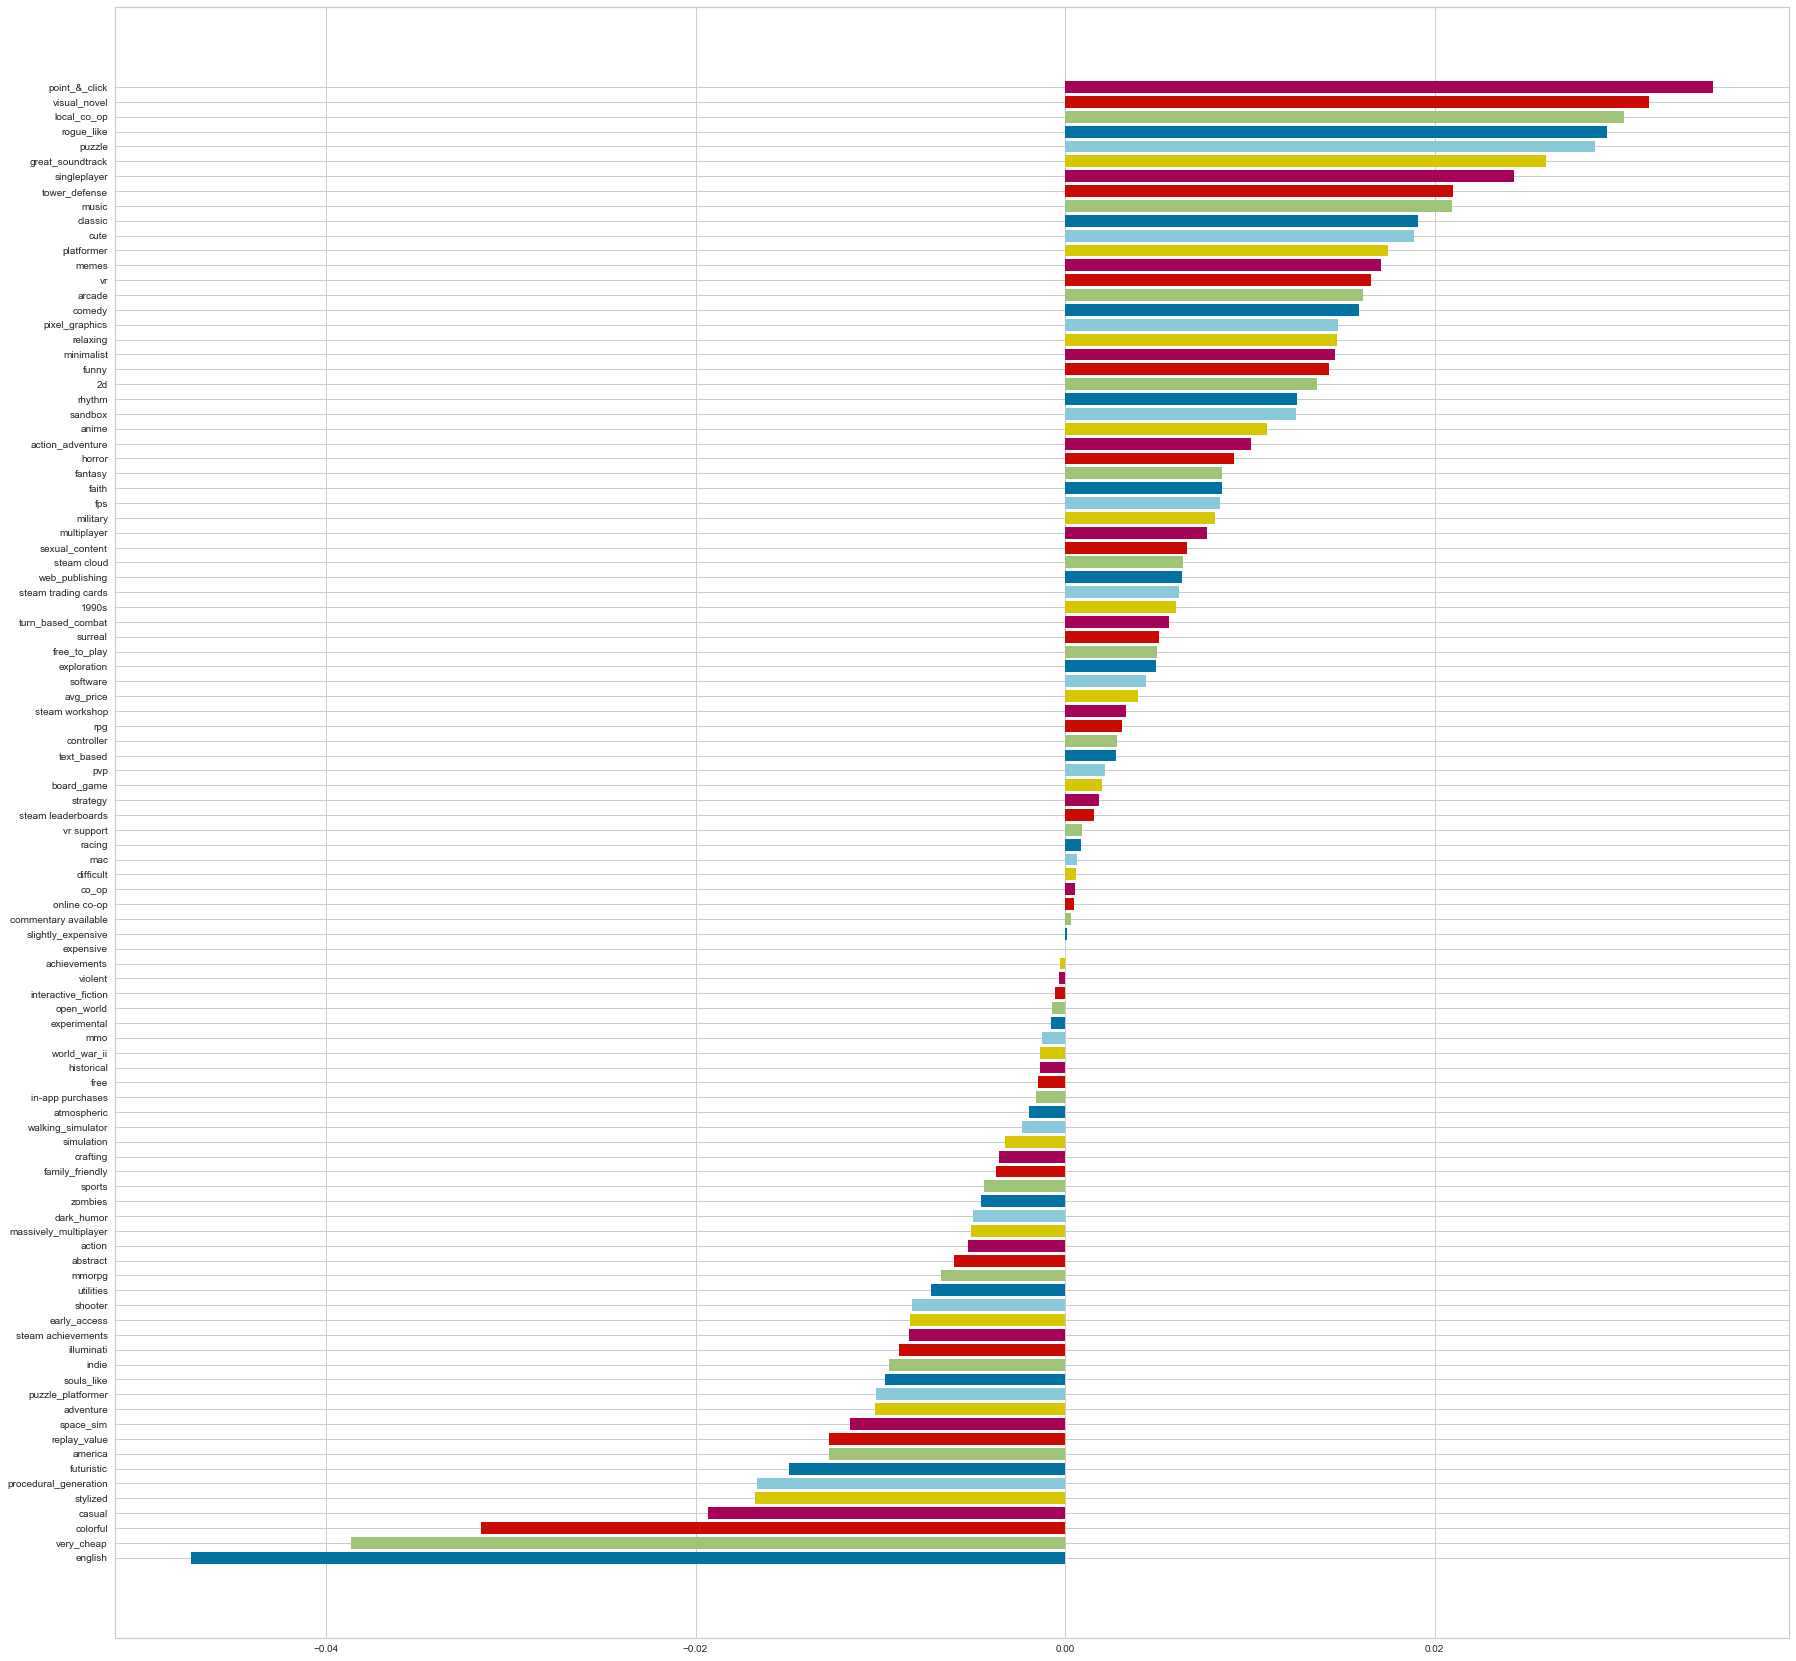

In [143]:
importlib.reload(k)
x_coef, y, coef = k.top_logreg_coef(x_top,y, RandomOverSampler(), 100)
coef = coef.sort_values(by='coef', ascending=False)
coef

In [ ]:
coef = coef.sort_values(by='coef', ascending=False)
coef.to_csv("log_reg_coef.csv", index=False)

## Tabpy

In [514]:
import tabpy_client
connection = tabpy_client.Client('http://localhost:9004/')

In [ ]:
client.deploy('predict_success', )

In [366]:
coef = coef.sort_values(by='coef', ascending=False)
coef.to_csv("log_reg_coef.csv", index=False)

## FLASK PICKLE 

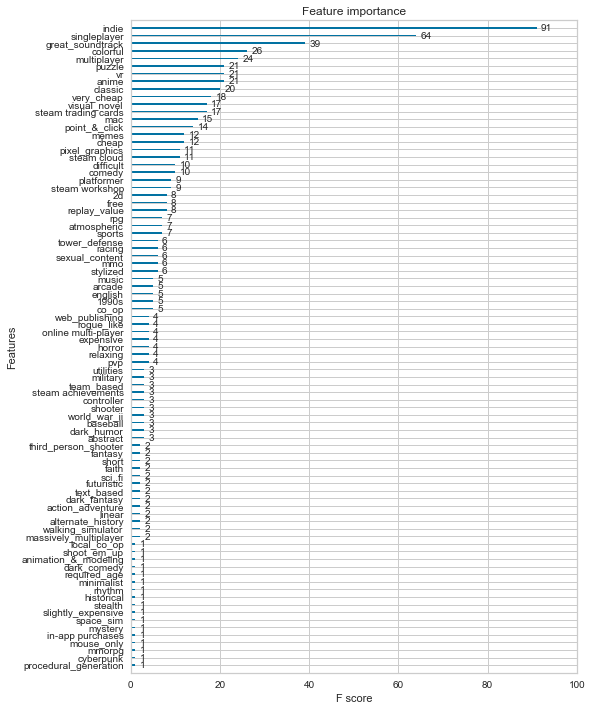

                       Gini-importance
singleplayer                  0.173797
steam cloud                   0.057929
indie                         0.056586
anime                         0.051842
multiplayer                   0.040518
very_cheap                    0.035151
steam trading cards           0.033710
great_soundtrack              0.032846
classic                       0.028135
vr                            0.025155
comedy                        0.021041
mac                           0.018373
puzzle                        0.015756
cheap                         0.015147
co_op                         0.014701
point_&_click                 0.014570
memes                         0.014375
visual_novel                  0.013988
horror                        0.011841
free                          0.011788
sexual_content                0.011388
pixel_graphics                0.011206
world_war_ii                  0.010361
dark_comedy                   0.009874
steam workshop           

In [616]:
x_top_15, y, top = k.top_xgb_importance(x_top, y, RandomOverSampler(), 15)

In [617]:
x_train, x_test, y_train, y_test = train_test_split(x_top_15, y, test_size=0.25, stratify=y)
x_balance, y_balance = k.balance(x_train, y_train, RandomOverSampler())
model = LogisticRegression()
model.fit(x_balance, y_balance)
print(f"""
train score: {model.score(x_balance, y_balance):%}
test score: {model.score(x_test, y_test):%}
""")


train score: 78.981255%
test score: 84.118777%



In [618]:
model.target_names = ['Success', 'Fail']
model.feature_names = list(x_train.columns)

In [619]:
def plot_ovr_coefs(model):
    """Helper to plot coefficients of a ovr model like Logistic Regression"""
    n_models, n_coef = model.coef_.shape

    lod = []
    for i in range(n_models):
        for j in range(n_coef):
            lod.append({
                "OVR Model": f"{model.target_names[i]} vs rest",
                "Coefficient Name": f"{model.feature_names[j]}",
                "Coefficient Value": model.coef_[i,j]
            })
    coef_df = pd.DataFrame(lod)


    sns.barplot(y="Coefficient Name", x="Coefficient Value", hue="OVR Model", orient="h", data=coef_df)

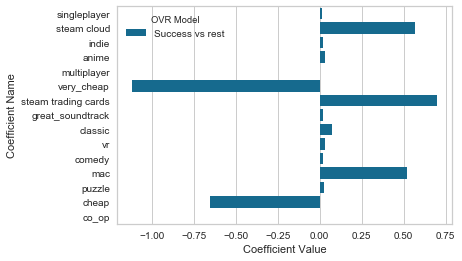

In [620]:
plot_ovr_coefs(model)

In [621]:
!mkdir -p predictor

In [622]:
import pickle

with open("predictor/lr.pickle", "wb") as f:
    pickle.dump(model, f)

In [623]:
with open("predictor/lr.pickle", "rb") as f:
    lr_model2 = pickle.load(f)

In [624]:
x_top_15.columns

Index(['singleplayer', 'steam cloud', 'indie', 'anime', 'multiplayer', 'very_cheap', 'steam trading cards', 'great_soundtrack', 'classic', 'vr', 'comedy', 'mac', 'puzzle', 'cheap', 'co_op'], dtype='object')